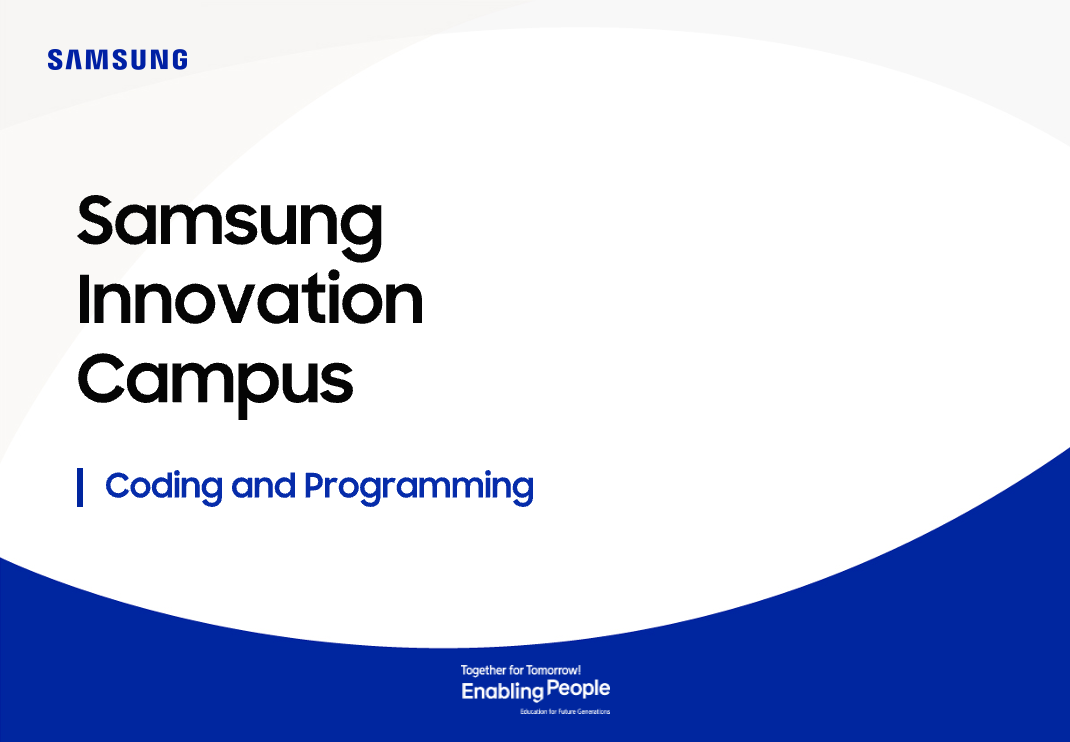

# <font size="50" color="lighblue">Análisis exploratorio de datos: </font><br> <font size="6" color="lighblue">Vectores NumPy para computación numérica optimizada y Pandas <br> Curso de AI</font>

## <font size="6" color="lighblue">Descripción del capítulo</font>

### *Descripción de los objetivos:*
* Comprender el uso preciso de NumPy y ser capaz de procesar datos de manera eficiente.
* Aprender los conceptos básicos de los vectores NumPy, la indexación y la división de NumPy (slicing) y las diversas formas de su aplicación.
* Aprender a crear y manejar series y objetos de marcos de datos (data frame objects).
* Conocer los métodos apropiados de ejecución óptima del modelo para el preprocesamiento de datos utilizando la librería Pandas para explorar y convertir datos.
* Ser capaz de encontrar el método de análisis adecuado implementando una visualización de datos adecuada para la escala de datos.

### *Contenidos del capítulo*
* Unidad 1. Estructura de datos de matriz NumPy para un rendimiento computacional óptimo
* **Unidad 2. Exploración óptima de datos a través de Pandas**
* Unidad 3. Preprocesamiento de datos de Pandas para una ejecución óptima del modelo
* Unidad 4. Visualización de datos para varias escalas de datos

# **Unidad 2:** Exploración óptima de datos a través de Pandas

2.1. Pipelines: estructuras de datos según tipos de datos<br>
2.2. Serie Pandas y DataFrames<br>
**2.3. Fusionar y vincular marcos de datos**<br>
2.4. Clasificación de marcos de datos y índice múltiple<br>
2.5. Examinar las características de los datos mediante estadísticas descriptivas y muestras de datos<br>

## Manipulación de DataFrame

#### Fusionando DataFrame:

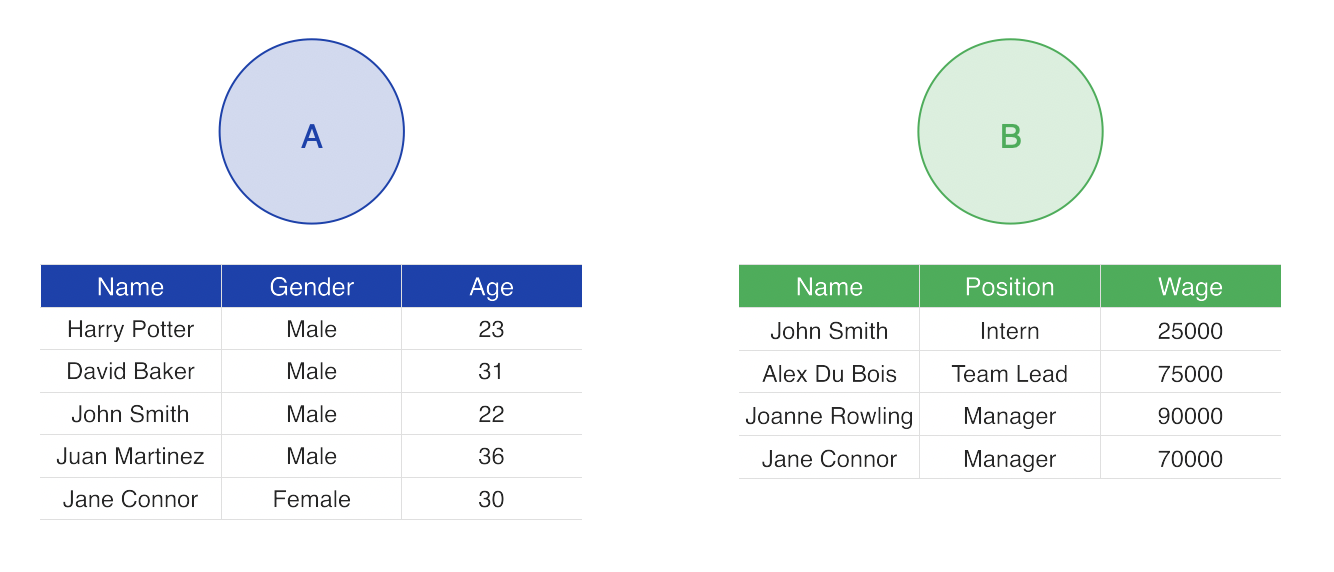

<FONT COLOR = gray>Nota: Supongamos que tenemos dos tablas de datos o DataFrames.
Y ahora nos gustaría fusionarlos (unirlos) uno al lado del otro.</FONT>

#### Fusión de DataFraame: A.Name y B.Name utilizados como claves (key)

* Podemos fusionar los DataFrames utilizando una variable clave común.
* En este ejemplo, "Name" es una variable compartida por los DataFrames A (izquierda) y B (derecha).
* Podemos identificar las filas (observaciones o registros) donde la variable clave tiene el mismo valor.

#### Fusión de DataFrame: unión interna (<FONT COLOR = blue>inner join</FONT>)

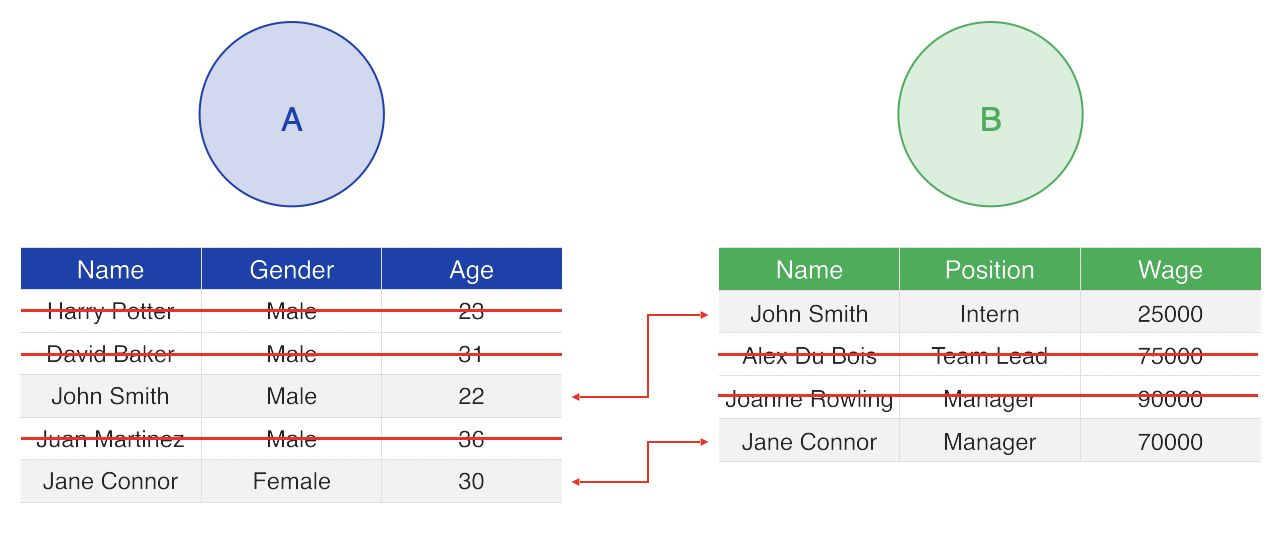

<FONT CLOR=gray>NOTA: La unión interna (INNER JOIN) significa fusionar los DataFrames solo para aquellas filas (observaciones) donde la variable clave tiene los mismos valores.</FONT>


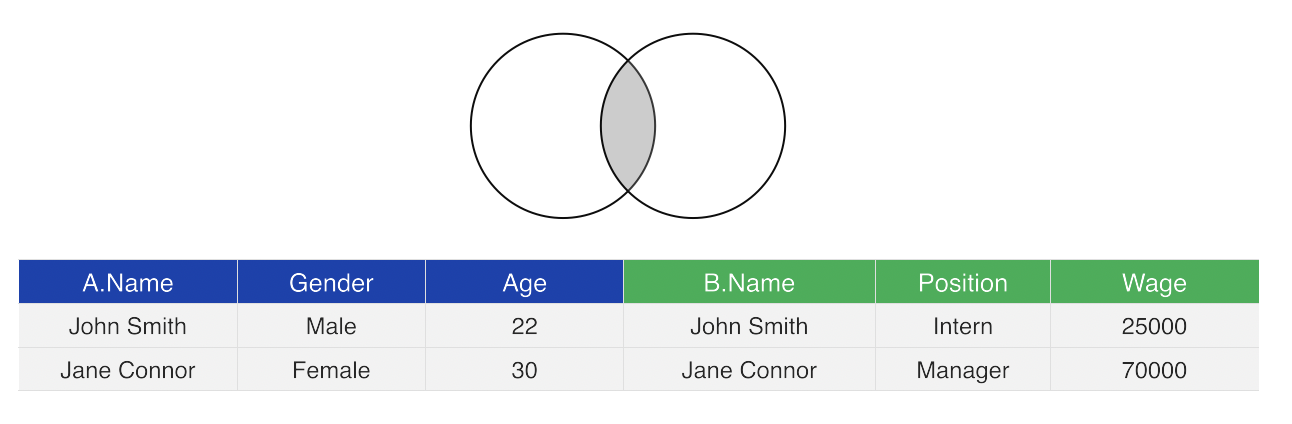


#### Fusionar DataFrame: unión izquierda (<FONT COLOR = blue>Left Join</FONT>)

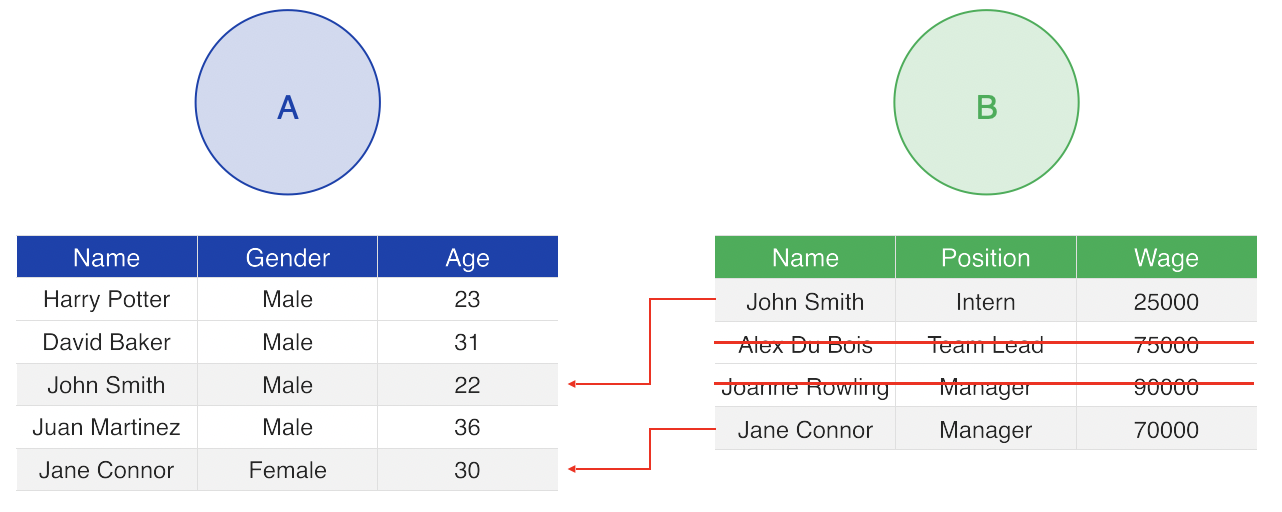

<FONT COLOR = gray>Para la unión izquierda (LEFT JOIN), se mantienen todas las filas de A (izquierda).
Mientras que desde B (derecha), solo se trae para fusionar la intersección (por la variable clave).</FONT>

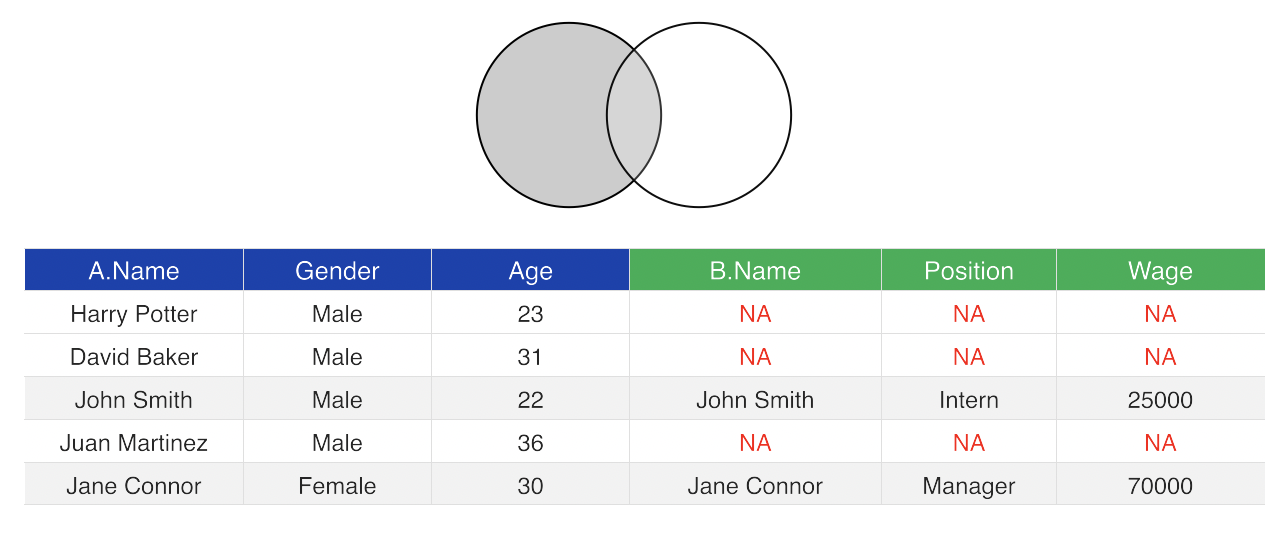

#### Fusionar DataFrame: unión derecha (<FONT COLOR = blue>Right Join</FONT>)

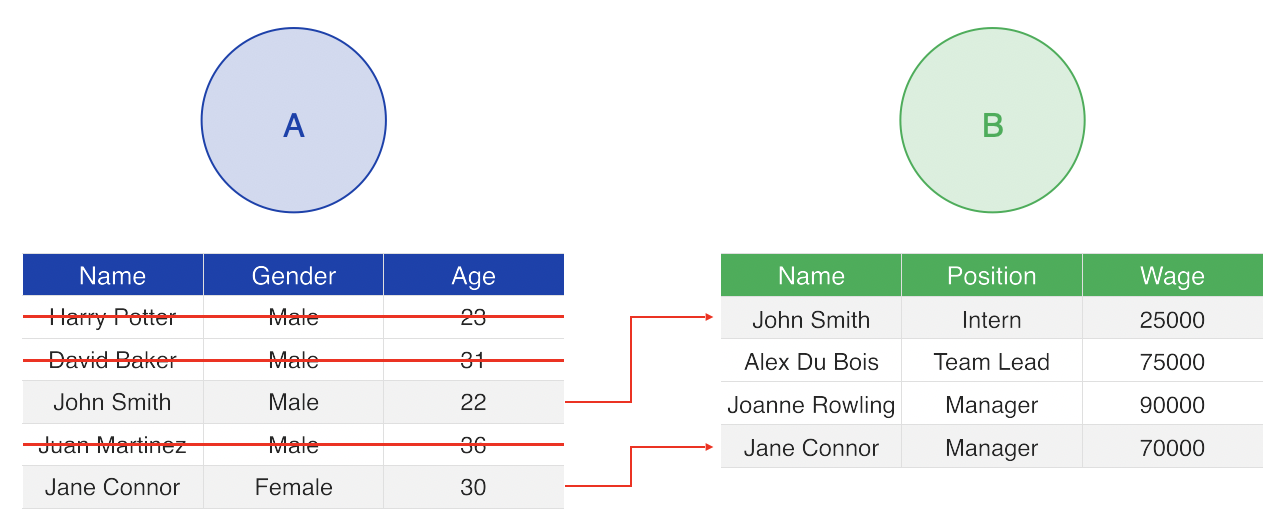

<FONT COLOR=gray>Para la unión derecha (RIGHT JOIN), se mantienen todas las filas de B (derecha).
Mientras que desde A (izquierda), solo se introduce para fusionar la intersección (por la variable clave).</FONT>

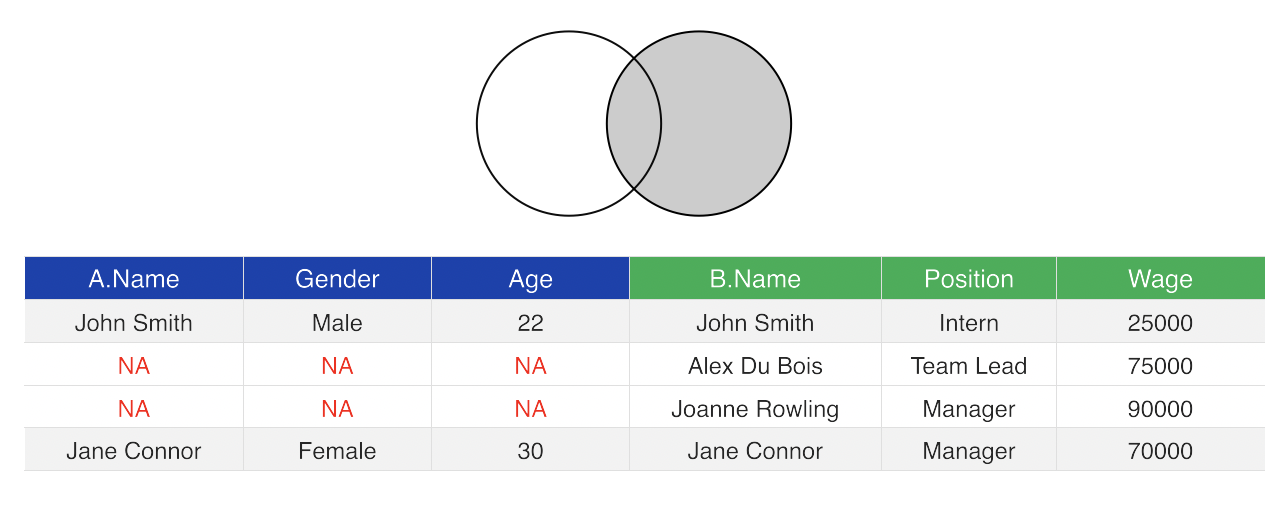

<FONT COLOR = gray>Nota: Después de la unión derecha, es posible que el DataFrame resultante le falten valores en el lado izquierdo.</FONT>

#### Fusión de DataFrame: unión externa completa (<FONT COLOR=blue>Full Outer Join</FONT>)

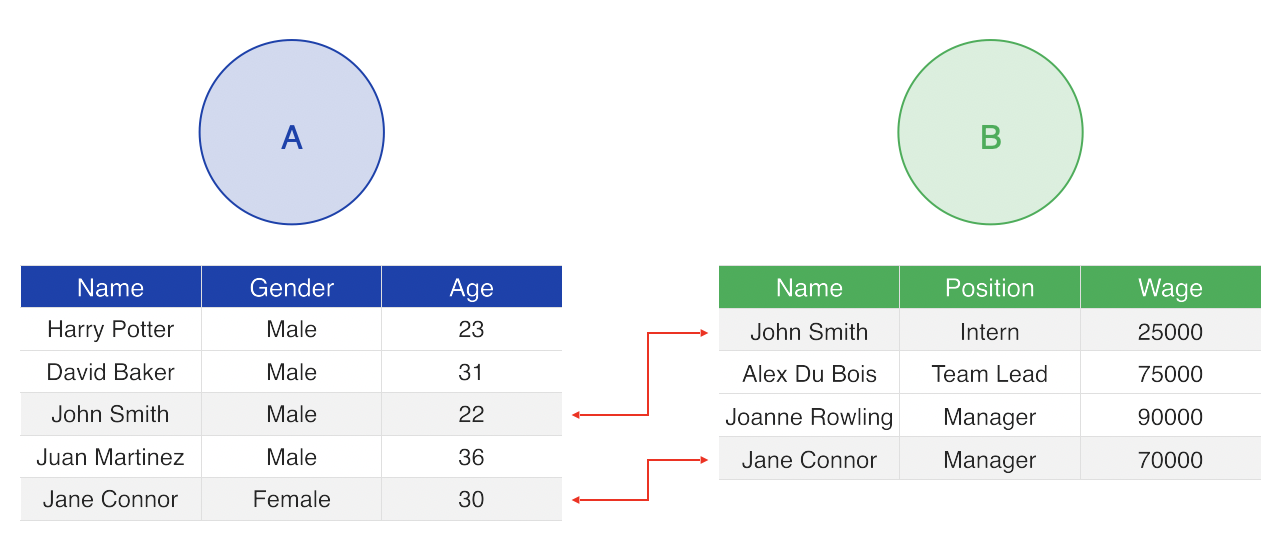

<FONT COLOR=gray>NOTA: Para la unión exterior completa (FULL OUTER JOIN), se mantienen todas las filas de A (izquierda) y B (derecha).</FONT>

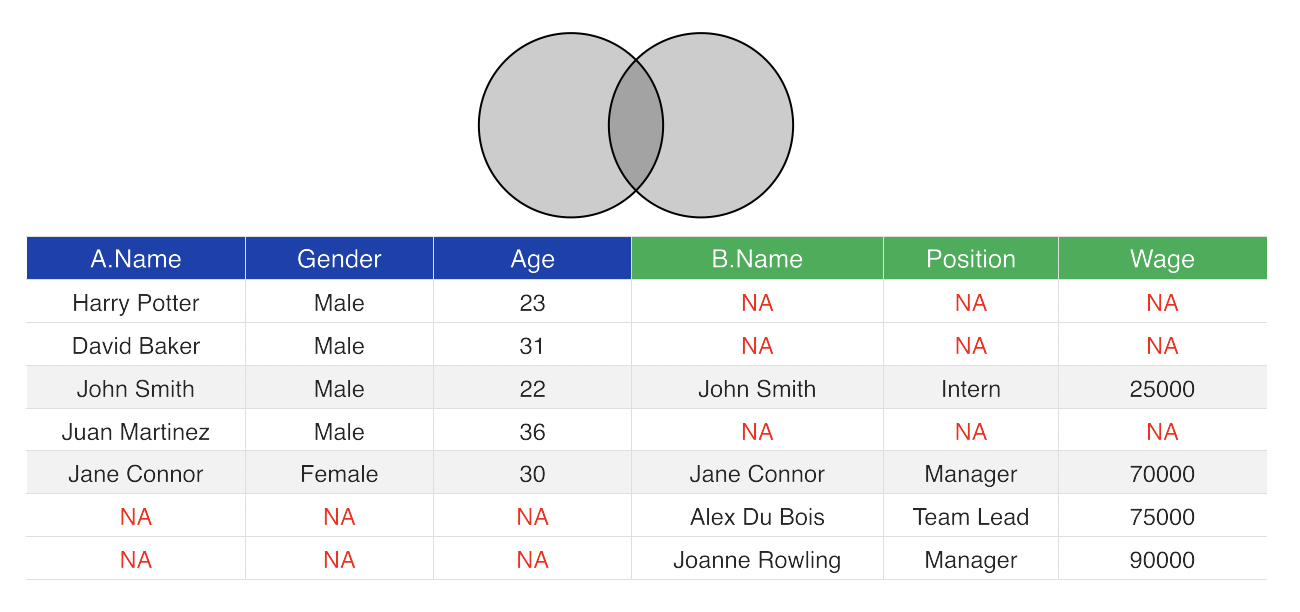

<FONT COLOR=gray>NOTA: Después de la unión externa completa, es posible que al DataFrame resultante le falten valores tanto a la izquierda como a la derecha.</FONT>

In [ ]:
import pandas as pd


In [ ]:
df_left = pd.DataFrame({'NAME':['Harry Potter','David Baker','John Smith','Juan Martinez','Jane Connor'],
                       'GENDER':['Male','Male','Male','Male','Female'],
                       'AGE': [23,31,22,36,30]})
df_right = pd.DataFrame({'NAME':['John Smith','Alex Du Bois','Joanne Rowling','Jane Connor'],
                       'POSITION':['Intern','Team Lead','Manager','Manager'],
                       'WAGE': [25000,75000,90000,70000]})

In [ ]:
AB_merged_inner1 = pd.merge(df_left, df_right, on='NAME')
AB_merged_inner2 = pd.merge(df_left, df_right, left_on='NAME', right_on='NAME', how='inner')
AB_merged_left = pd.merge(df_left, df_right, left_on='NAME', right_on='NAME', how='left')
AB_merged_right = pd.merge(df_left, df_right, left_on='NAME', right_on='NAME', how='right')
AB_merged_outer = pd.merge(df_left, df_right, left_on='NAME', right_on='NAME', how='outer')

print(f'\ninner join 1:\n {AB_merged_inner1}')
print(f'\ninner join 2:\n {AB_merged_inner2}')
print(f'\nleft join:\n {AB_merged_left}')
print(f'\nright join:\n {AB_merged_right}')
print(f'\nfull outer join:\n {AB_merged_outer}')


inner join 1:
           NAME  GENDER  AGE POSITION   WAGE
0   John Smith    Male   22   Intern  25000
1  Jane Connor  Female   30  Manager  70000

inner join 2:
           NAME  GENDER  AGE POSITION   WAGE
0   John Smith    Male   22   Intern  25000
1  Jane Connor  Female   30  Manager  70000

left join:
             NAME  GENDER  AGE POSITION     WAGE
0   Harry Potter    Male   23      NaN      NaN
1    David Baker    Male   31      NaN      NaN
2     John Smith    Male   22   Intern  25000.0
3  Juan Martinez    Male   36      NaN      NaN
4    Jane Connor  Female   30  Manager  70000.0

right join:
              NAME  GENDER   AGE   POSITION   WAGE
0      John Smith    Male  22.0     Intern  25000
1    Alex Du Bois     NaN   NaN  Team Lead  75000
2  Joanne Rowling     NaN   NaN    Manager  90000
3     Jane Connor  Female  30.0    Manager  70000

full outer join:
              NAME  GENDER   AGE   POSITION     WAGE
0    Harry Potter    Male  23.0        NaN      NaN
1     David Bake

In [ ]:
union1=pd.merge(df_left, df_right, on='NAME')

union1.loc[union1.AGE<30]

,NAME,GENDER,AGE,POSITION,WAGE
0,John Smith,Male,22,Intern,25000


#### Fusionar y vincular DataFrame:

In [ ]:
df_A = df_left[:]
df_B = df_right[:]

print(f'Enlace verticalmente haciendo coincidir los nombres de las columnas:\n{pd.concat([df_A, df_B], sort=True)}')
print(f'\n\nUnir horizontalmente haciendo coincidir los índices.:\n{pd.concat([df_A, df_B], axis=1, sort=True)}')

Enlace verticalmente haciendo coincidir los nombres de las columnas:
    AGE  GENDER            NAME   POSITION     WAGE
0  23.0    Male    Harry Potter        NaN      NaN
1  31.0    Male     David Baker        NaN      NaN
2  22.0    Male      John Smith        NaN      NaN
3  36.0    Male   Juan Martinez        NaN      NaN
4  30.0  Female     Jane Connor        NaN      NaN
0   NaN     NaN      John Smith     Intern  25000.0
1   NaN     NaN    Alex Du Bois  Team Lead  75000.0
2   NaN     NaN  Joanne Rowling    Manager  90000.0
3   NaN     NaN     Jane Connor    Manager  70000.0


Unir horizontalmente haciendo coincidir los índices.:
            NAME  GENDER  AGE            NAME   POSITION     WAGE
0   Harry Potter    Male   23      John Smith     Intern  25000.0
1    David Baker    Male   31    Alex Du Bois  Team Lead  75000.0
2     John Smith    Male   22  Joanne Rowling    Manager  90000.0
3  Juan Martinez    Male   36     Jane Connor    Manager  70000.0
4    Jane Connor  Female 

#### Vincular DataFrame:

* Cuando los datos se dividen en varios lugares, puede ser necesario combinarlos o vincularlos en uno. En Pandas, las funciones utilizadas para combinar o vincular DataFrames incluyen concat(), merge() y join.
pandas.concat (lista de DataFrames)
* Si no se especifica la dirección axial, se aplica la opción predeterminada axis=0 y se conecta en la dirección de fila arriba/abajo.

#### Vincular DataFrames:

In [ ]:
df1 = pd.DataFrame({'a':['a0','a1','a2','a3'],
                    'b':['b0','b1','b2','b3'],
                    'c':['c0','c1','c2','c3']},
                    index=[0,1,2,3])
df1

,a,b,c
0,a0,b0,c0
1,a1,b1,c1
2,a2,b2,c2
3,a3,b3,c3


In [ ]:
df2 = pd.DataFrame({'a':['a2','a3','a4','a5'],
                    'b':['b2','b3','b4','b5'],
                    'c':['c2','c3','c4','c5'],
                    'd':['d2','d3','d4','d5']},
                    index=[2,3,4,5])
df2

,a,b,c,d
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5


* Las filas 0, 1, 2 y 3 derivadas de df1 se ingresan como NaN porque no hay una columna "d".

In [ ]:
pd.concat([df1,df2])

,a,b,c,d
0,a0,b0,c0,NaN
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,a3,b3,c3,NaN
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5


ayuda help(pd.concat). ignore_index

In [ ]:
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs: 'Iterable[NDFrame] | Mapping[HashableT, NDFrame]', *, axis: 'Axis' = 0, join: 'str' = 'outer', ignore_index: 'bool' = False, keys=None, levels=None, names=None, verify_integrity: 'bool' = False, sort: 'bool' = False, copy: 'bool' = True) -> 'DataFrame | Series'
    Concatenate pandas objects along a particular axis.
    
    Allows optional set logic along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series or DataFrame objects
        If a mapping is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they are all None in which case a V

In [ ]:
pd.concat([df1,df2],ignore_index=True)

,a,b,c,d
0,a0,b0,c0,NaN
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,a3,b3,c3,NaN
4,a2,b2,c2,d2
5,a3,b3,c3,d3
6,a4,b4,c4,d4
7,a5,b5,c5,d5


* La opción Axis=1 vincula el DataFrame en las direcciones de la columna izquierda/derecha.

In [ ]:
pd.concat([df1,df2],axis=1)

,a,b,c,a,b,c,d
0,a0,b0,c0,NaN,NaN,NaN,NaN
1,a1,b1,c1,NaN,NaN,NaN,NaN
2,a2,b2,c2,a2,b2,c2,d2
3,a3,b3,c3,a3,b3,c3,d3
4,NaN,NaN,NaN,a4,b4,c4,d4
5,NaN,NaN,NaN,a5,b5,c5,d5


* La función concat() es un concepto que fusiona los dos DataFrames según un determinado criterio de manera <FONT COLOR=blue>similar al comando de unión de SQL</FONT>. En este caso, la columna o índice que es la referencia se denomina clave. **La clave debe existir en ambos DataFrames.**

In [1]:
import os

## ADVERTENCIA: Comentar esta celda si NO está trabajando dentro de Google Colaboratory
from google.colab import drive
drive.mount('/content/drive')
os.getcwd()
os.chdir("/content/drive/MyDrive/Ejercicio_Febrero_2024") ## Cambie esta ruta por la de su sistema de archivos
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/Ejercicio_Febrero_2024'

In [ ]:
# En Jupyter: Dirígete al directorio donde se encuentra el archivo de datos.
try:
  os.chdir(r'~~') # Por favor, reemplaza la ruta en tu PC a './stock price.xlsx'
except:
  print('archivo no encontrado')

In [ ]:
# En Jupyter: Dirígete al directorio donde se encuentra el archivo de datos.
try:
  os.chdir(r'~~') # Por favor, reemplaza la ruta en tu PC a './stock valuation.xlsx'
except:
  print('archivo no encontrado')

In [3]:
import pandas as pd

In [4]:
#Crear los DataFrames con Stock Market Data
df1 = pd.read_excel('./stock price.xlsx')
df2 = pd.read_excel('./stock valuation.xlsx')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          10 non-null     int64  
 1   stock_name  10 non-null     object 
 2   value       10 non-null     float64
 3   price       10 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


aclarar que es id, posiblemente consecutivo o codigo de referencia

Por que value es decimal y price es entero, diferencia entre ambos?

In [ ]:
df1.head()

,id,stock_name,value,price
0,128940,Hanmi Pharmaceutical,59385.666667,421000
1,130960,CJ E&M,58540.666667,98900
2,138250,NS Shopping,14558.666667,13200
3,139480,E-mart,239230.833333,254500
4,142280,Green Cross Medical Science Corporation,468.833333,10200


id es una referencia efectivamente



In [7]:
df2.head(n=10)

,id,name,eps,bps,per,pbr
0,130960,CJ E&M,6301.333333,54068,15.695091,1.829178
1,136480,Harim Co.,274.166667,3551,11.489362,0.887074
2,138040,Meritz Financial Group,2122.333333,14894,6.313806,0.899691
3,139480,E-mart,18268.166667,295780,13.931338,0.860437
4,145990,Samyang,5741.000000,108090,14.283226,0.758627
5,161390,Hankook Tire,5648.500000,51341,7.453306,0.820007
6,181710,NHN Entertainment,2110.166667,78434,30.755864,0.827447
7,185750,Chong Kun Dang,3990.333333,40684,25.185866,2.470259
8,204210,Mode Tour Reit,85.166667,5335,40.802348,0.651359
9,207940,Samsung BioLogics,4644.166667,60099,89.790059,6.938551


<FONT COLOR=red>La clave aquí debe ser una identificación con un valor que no se superponga.</FONT>

* Consulta la ayuda help(pd.merge) para obtener más detalles.

* Pongamos dos DataFrames como parámetros y fusionémoslos.

In [8]:
pd.merge(df1,df2)

,id,stock_name,value,price,name,eps,bps,per,pbr
0,130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
1,139480,E-mart,239230.833333,254500,E-mart,18268.166667,295780,13.931338,0.860437
2,145990,Samyang,82750.000000,82000,Samyang,5741.000000,108090,14.283226,0.758627
3,185750,Chong Kun Dang,40293.666667,100500,Chong Kun Dang,3990.333333,40684,25.185866,2.470259
4,204210,Mode Tour Reit,3093.333333,3475,Mode Tour Reit,85.166667,5335,40.802348,0.651359


<FONT COLOR=red>Si no hay nombres comunes en las columnas, se produce un error.

* en help(pd.merge) se encuentra la manera de resolver el error</FONT>

Ayuda sobre la combinación de funciones en el módulo pandas.core.reshape.merge:

fusionar (izquierda: 'DataFrame | Series', derecha: 'DataFrame | Series', cómo: 'str' = 'inner', en: 'IndexLabel | Ninguno' = Ninguno, left_on: 'IndexLabel | Ninguno' = Ninguno, right_on: 'IndexLabel | Ninguno' = Ninguno, índice_izquierdo: 'bool' = Falso, índice_derecho: 'bool' = Falso, ordenar: 'bool' = Falso, sufijos: 'Sufijos' = ('_x', '_y'), copiar: 'bool' = Verdadero, indicador: 'bool' = Falso, validar: 'str | Ninguno' = Ninguno) -> 'DataFrame'
     Fusione DataFrame o objetos de serie con nombre con una combinación de estilo de base de datos.
    
     Un objeto de serie con nombre se trata como un marco de datos con una única columna con nombre.
    
     La unión se realiza en columnas o índices. Si une columnas en
     columnas, los índices del DataFrame *se ignorarán*. De lo contrario, si se une a índices
     en índices o índices en una columna o columnas, el índice se transmitirá.
     Al realizar una combinación cruzada, no hay especificaciones de columna para fusionar.
     permitido.

* Las opciones on=None y how='inner' se aplican como valores predeterminados. La opción on=None significa fusionar todas las columnas que pertenecen en común a los dos DataFrames en una referencia (key).
* La opción how='inner' significa que los datos de la columna de referencia se extraen solo cuando los datos son una intersección común a ambos DataFrames.
* Fusionamos y devolvemos cinco acciones comúnmente existentes según la columna "id".

* Si usamos how='left', se devolverán todas las empresas en el DataFrame izquierdo y las que no estén a la derecha se tratarán como NaN.

In [10]:
pd.merge(df1,df2, on='id', how='left')

,id,stock_name,value,price,name,eps,bps,per,pbr
0,128940,Hanmi Pharmaceutical,59385.666667,421000,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,NS Shopping,14558.666667,13200,NaN,NaN,NaN,NaN,NaN
3,139480,E-mart,239230.833333,254500,E-mart,18268.166667,295780.0,13.931338,0.860437
4,142280,Green Cross Medical Science Corporation,468.833333,10200,NaN,NaN,NaN,NaN,NaN
5,145990,Samyang,82750.000000,82000,Samyang,5741.000000,108090.0,14.283226,0.758627
6,185750,Chong Kun Dang,40293.666667,100500,Chong Kun Dang,3990.333333,40684.0,25.185866,2.470259
7,192400,Cuckoo Holdings,179204.666667,177500,NaN,NaN,NaN,NaN,NaN
8,199800,Toolgen,-2514.333333,115400,NaN,NaN,NaN,NaN,NaN
9,204210,Mode Tour Reit,3093.333333,3475,Mode Tour Reit,85.166667,5335.0,40.802348,0.651359


* Si usamos how='right', se devolverán todas las empresas en el DataFrame derecho y las que no estén en el izquierdo se tratarán como NaN.

In [ ]:
pd.merge(df1,df2, on='id', how='Right')

,id,stock_name,value,price,name,eps,bps,per,pbr
0,130960,CJ E&M,58540.666667,98900.0,CJ E&M,6301.333333,54068,15.695091,1.829178
1,136480,NaN,NaN,NaN,Harim Co.,274.166667,3551,11.489362,0.887074
2,138040,NaN,NaN,NaN,Meritz Financial Group,2122.333333,14894,6.313806,0.899691
3,139480,E-mart,239230.833333,254500.0,E-mart,18268.166667,295780,13.931338,0.860437
4,145990,Samyang,82750.000000,82000.0,Samyang,5741.000000,108090,14.283226,0.758627
5,161390,NaN,NaN,NaN,Hankook Tire,5648.500000,51341,7.453306,0.820007
6,181710,NaN,NaN,NaN,NHN Entertainment,2110.166667,78434,30.755864,0.827447
7,185750,Chong Kun Dang,40293.666667,100500.0,Chong Kun Dang,3990.333333,40684,25.185866,2.470259
8,204210,Mode Tour Reit,3093.333333,3475.0,Mode Tour Reit,85.166667,5335,40.802348,0.651359
9,207940,NaN,NaN,NaN,Samsung BioLogics,4644.166667,60099,89.790059,6.938551


* Si usamos how="outer", se devuelven todos los datos de la izquierda y la derecha.

In [11]:
pd.merge(df1,df2, on='id', how='outer')

,id,stock_name,value,price,name,eps,bps,per,pbr
0,128940,Hanmi Pharmaceutical,59385.666667,421000.0,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900.0,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,NS Shopping,14558.666667,13200.0,NaN,NaN,NaN,NaN,NaN
3,139480,E-mart,239230.833333,254500.0,E-mart,18268.166667,295780.0,13.931338,0.860437
4,142280,Green Cross Medical Science Corporation,468.833333,10200.0,NaN,NaN,NaN,NaN,NaN
5,145990,Samyang,82750.000000,82000.0,Samyang,5741.000000,108090.0,14.283226,0.758627
6,185750,Chong Kun Dang,40293.666667,100500.0,Chong Kun Dang,3990.333333,40684.0,25.185866,2.470259
7,192400,Cuckoo Holdings,179204.666667,177500.0,NaN,NaN,NaN,NaN,NaN
8,199800,Toolgen,-2514.333333,115400.0,NaN,NaN,NaN,NaN,NaN
9,204210,Mode Tour Reit,3093.333333,3475.0,Mode Tour Reit,85.166667,5335.0,40.802348,0.651359


# **Ejercicio de codificación #0106**

<font size="50" color="lighblue">ARCHIVO ex_0106.ipynb</font>

**NOTA: DE QUÉ SE TRATA ESTA PRÁCTICA**<br>
En esta práctica, aprenderás cómo transformar DataFrames. Puedes remodelar, reorganizar y fusionar de muchas maneras diferentes.

**INSTRUCCIÓN DE PRÁCTICA**<br>
Inicia Jupyter Notebook.
En Jupyter Notebook, da clic en el archivo ex_0106.ipynb en la carpeta Ejercicio de codificación.

Revisa los ejemplos sobre los  siguientes temas:<br>
Transformando DataFrames.
Agregar y eliminar columnas.
Fusionando DataFrames.
DataFrames vinculantes.

### 1. Transformación de DataFrames:

In [12]:
import pandas as pd
import numpy as np
import os

In [ ]:
# En Jupyter: Dirígete al directorio donde se encuentra el archivo de datos.
try:
  os.chdir(r'~~') # Por favor, reemplaza la ruta en tu PC a 'data_studentlist.csv'
except:
  print('archivo no encontrado')

In [14]:
## ADVERTENCIA: Comentar esta celda si NO está trabajando dentro de Google Colaboratory
from google.colab import drive
drive.mount('/content/drive')
os.getcwd()
os.chdir("/content/drive/MyDrive/Ejercicio_Febrero_2024") ## Cambie esta ruta por la de su sistema de archivos
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Ejercicio_Febrero_2024'

In [27]:
df = pd.read_csv('data_studentlist.csv', header='infer')

In [28]:
df.head()

,Name,Gender,Age,Grade,Absence,Bloodtype,Height,Weight
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1
3,David Hassel,M,23,3,N,AB,182.1,85.7
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5


In [29]:
# Reemplazar las columnas (encabezado) o (header).
df.head()
#df.columns = ['NAME', 'GENDER' , 'AGE', 'GRADE', 'ABSENCE', 'BLOODTYPE', 'HEIGHT', 'WEIGHT']
df.columns = df.columns.str.upper()
df.head(3)

,NAME,GENDER,AGE,GRADE,ABSENCE,BLOODTYPE,HEIGHT,WEIGHT
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1


#### 1.1. Agregar y eliminar columnas:


In [30]:
df['BMI'] = 10000*df['WEIGHT']/df['HEIGHT']**2
df.head(5)

,NAME,GENDER,AGE,GRADE,ABSENCE,BLOODTYPE,HEIGHT,WEIGHT,BMI
0,Jared Diamond,M,23,3,Y,O,165.3,68.2,24.959660
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0,18.317544
2,Brian Martin,M,24,4,N,B,175.0,80.1,26.155102
3,David Hassel,M,23,3,N,AB,182.1,85.7,25.844071
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5,17.538265


In [32]:
df.shape

(17, 9)

In [33]:
df['rango']=pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

In [39]:
df.head()
df.drop("rango", axis=1, inplace=True)

In [40]:
# El método drop() elimina una columna. Pero es sólo una "vista".
df.drop('BMI',axis=1)

,NAME,GENDER,AGE,GRADE,ABSENCE,BLOODTYPE,HEIGHT,WEIGHT
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1
3,David Hassel,M,23,3,N,AB,182.1,85.7
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5
5,Jennifer Lorentz,F,21,2,N,O,162.0,52.0
6,Susan Clark,F,22,1,N,O,155.2,45.3
7,Margareth Jones,F,23,1,N,A,176.9,55.0
8,John Bertsch,M,23,3,N,B,178.5,64.2
9,Jake Timmerman,M,22,2,N,B,176.1,61.3


In [38]:
# 'drop' o eliminación no fue permanente,
df.head(5)

,NAME,GENDER,AGE,GRADE,ABSENCE,BLOODTYPE,HEIGHT,WEIGHT,BMI,rango
0,Jared Diamond,M,23,3,Y,O,165.3,68.2,24.959660,1
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0,18.317544,2
2,Brian Martin,M,24,4,N,B,175.0,80.1,26.155102,3
3,David Hassel,M,23,3,N,AB,182.1,85.7,25.844071,4
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5,17.538265,5


In [41]:
# inplace=True hace que la eliminación sea permanente.
df.drop('BMI',axis=1,inplace=True)
df.head(5)

,NAME,GENDER,AGE,GRADE,ABSENCE,BLOODTYPE,HEIGHT,WEIGHT
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1
3,David Hassel,M,23,3,N,AB,182.1,85.7
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5


#### 1.2. Fusionando DataFrame:

In [43]:
df_left = df.loc[:,['NAME','AGE','GENDER','GRADE','ABSENCE']]
df_left_small = df_left.loc[:10,]
df_left_small

,NAME,AGE,GENDER,GRADE,ABSENCE
0,Jared Diamond,23,M,3,Y
1,Sarah O'Donnel,22,F,2,N
2,Brian Martin,24,M,4,N
3,David Hassel,23,M,3,N
4,Clara Rodriquez,20,F,1,Y
5,Jennifer Lorentz,21,F,2,N
6,Susan Clark,22,F,1,N
7,Margareth Jones,23,F,1,N
8,John Bertsch,23,M,3,N
9,Jake Timmerman,22,M,2,N


In [44]:
df_right = df.loc[:,['NAME','BLOODTYPE','WEIGHT','HEIGHT']]
df_right_small = df_right.loc[7:,]
df_right_small

,NAME,BLOODTYPE,WEIGHT,HEIGHT
7,Margareth Jones,A,55.0,176.9
8,John Bertsch,B,64.2,178.5
9,Jake Timmerman,B,61.3,176.1
10,Joshua Connor,O,62.0,167.1
11,John Matsuda,AB,75.8,180.0
12,Eddy Johnson,A,55.3,162.2
13,Rebecah Anderson,O,53.1,176.1
14,Linda Carter,B,45.2,158.2
15,Richard Swayze,B,70.2,168.6
16,Andrew King,A,62.2,169.2


Inner join:

In [45]:
pd.merge(df_left_small,df_right_small,left_on='NAME', right_on = 'NAME', how='inner')

,NAME,AGE,GENDER,GRADE,ABSENCE,BLOODTYPE,WEIGHT,HEIGHT
0,Margareth Jones,23,F,1,N,A,55.0,176.9
1,John Bertsch,23,M,3,N,B,64.2,178.5
2,Jake Timmerman,22,M,2,N,B,61.3,176.1
3,Joshua Connor,24,M,4,Y,O,62.0,167.1


Left join:

In [46]:
pd.merge(df_left_small,df_right_small,left_on='NAME', right_on = 'NAME', how='left')

,NAME,AGE,GENDER,GRADE,ABSENCE,BLOODTYPE,WEIGHT,HEIGHT
0,Jared Diamond,23,M,3,Y,NaN,NaN,NaN
1,Sarah O'Donnel,22,F,2,N,NaN,NaN,NaN
2,Brian Martin,24,M,4,N,NaN,NaN,NaN
3,David Hassel,23,M,3,N,NaN,NaN,NaN
4,Clara Rodriquez,20,F,1,Y,NaN,NaN,NaN
5,Jennifer Lorentz,21,F,2,N,NaN,NaN,NaN
6,Susan Clark,22,F,1,N,NaN,NaN,NaN
7,Margareth Jones,23,F,1,N,A,55.0,176.9
8,John Bertsch,23,M,3,N,B,64.2,178.5
9,Jake Timmerman,22,M,2,N,B,61.3,176.1


Right join:

In [47]:
pd.merge(df_left_small,df_right_small,left_on='NAME', right_on = 'NAME', how='right')

,NAME,AGE,GENDER,GRADE,ABSENCE,BLOODTYPE,WEIGHT,HEIGHT
0,Margareth Jones,23.0,F,1.0,N,A,55.0,176.9
1,John Bertsch,23.0,M,3.0,N,B,64.2,178.5
2,Jake Timmerman,22.0,M,2.0,N,B,61.3,176.1
3,Joshua Connor,24.0,M,4.0,Y,O,62.0,167.1
4,John Matsuda,NaN,NaN,NaN,NaN,AB,75.8,180.0
5,Eddy Johnson,NaN,NaN,NaN,NaN,A,55.3,162.2
6,Rebecah Anderson,NaN,NaN,NaN,NaN,O,53.1,176.1
7,Linda Carter,NaN,NaN,NaN,NaN,B,45.2,158.2
8,Richard Swayze,NaN,NaN,NaN,NaN,B,70.2,168.6
9,Andrew King,NaN,NaN,NaN,NaN,A,62.2,169.2


Full outer join:

In [48]:
pd.merge(df_left_small,df_right_small,left_on='NAME', right_on = 'NAME', how='outer')

,NAME,AGE,GENDER,GRADE,ABSENCE,BLOODTYPE,WEIGHT,HEIGHT
0,Jared Diamond,23.0,M,3.0,Y,NaN,NaN,NaN
1,Sarah O'Donnel,22.0,F,2.0,N,NaN,NaN,NaN
2,Brian Martin,24.0,M,4.0,N,NaN,NaN,NaN
3,David Hassel,23.0,M,3.0,N,NaN,NaN,NaN
4,Clara Rodriquez,20.0,F,1.0,Y,NaN,NaN,NaN
5,Jennifer Lorentz,21.0,F,2.0,N,NaN,NaN,NaN
6,Susan Clark,22.0,F,1.0,N,NaN,NaN,NaN
7,Margareth Jones,23.0,F,1.0,N,A,55.0,176.9
8,John Bertsch,23.0,M,3.0,N,B,64.2,178.5
9,Jake Timmerman,22.0,M,2.0,N,B,61.3,176.1


#### 1.3. DataFrames vinculantes:

Enlazar verticalmente emparejado por 'columnas':

In [49]:
pd.concat([df_left_small,df_right_small],sort=True)

,ABSENCE,AGE,BLOODTYPE,GENDER,GRADE,HEIGHT,NAME,WEIGHT
0,Y,23.0,NaN,M,3.0,NaN,Jared Diamond,NaN
1,N,22.0,NaN,F,2.0,NaN,Sarah O'Donnel,NaN
2,N,24.0,NaN,M,4.0,NaN,Brian Martin,NaN
3,N,23.0,NaN,M,3.0,NaN,David Hassel,NaN
4,Y,20.0,NaN,F,1.0,NaN,Clara Rodriquez,NaN
5,N,21.0,NaN,F,2.0,NaN,Jennifer Lorentz,NaN
6,N,22.0,NaN,F,1.0,NaN,Susan Clark,NaN
7,N,23.0,NaN,F,1.0,NaN,Margareth Jones,NaN
8,N,23.0,NaN,M,3.0,NaN,John Bertsch,NaN
9,N,22.0,NaN,M,2.0,NaN,Jake Timmerman,NaN


Enlazar horizontalmente coincidente por 'índice':

In [50]:
pd.concat([df_left_small,df_right_small],axis=1,sort=True)

,NAME,AGE,GENDER,GRADE,ABSENCE,NAME,BLOODTYPE,WEIGHT,HEIGHT
0,Jared Diamond,23.0,M,3.0,Y,NaN,NaN,NaN,NaN
1,Sarah O'Donnel,22.0,F,2.0,N,NaN,NaN,NaN,NaN
2,Brian Martin,24.0,M,4.0,N,NaN,NaN,NaN,NaN
3,David Hassel,23.0,M,3.0,N,NaN,NaN,NaN,NaN
4,Clara Rodriquez,20.0,F,1.0,Y,NaN,NaN,NaN,NaN
5,Jennifer Lorentz,21.0,F,2.0,N,NaN,NaN,NaN,NaN
6,Susan Clark,22.0,F,1.0,N,NaN,NaN,NaN,NaN
7,Margareth Jones,23.0,F,1.0,N,Margareth Jones,A,55.0,176.9
8,John Bertsch,23.0,M,3.0,N,John Bertsch,B,64.2,178.5
9,Jake Timmerman,22.0,M,2.0,N,Jake Timmerman,B,61.3,176.1


# **Ejercicio de codificación #0107**

<font size="50" color="lighblue">ARCHIVO ex_0107.ipynb</font>

**NOTA: DE QUÉ SE TRATA ESTA PRÁCTICA**<br>
En esta práctica, aprenderás cómo transformar DataFrames. Puedes remodelar, reorganizar y fusionar de muchas maneras diferentes.

**INSTRUCCIÓN DE PRÁCTICA**<br>
Inicia Jupyter Notebook.
En Jupyter Notebook, da clic en el archivo ex_0107.ipynb en la carpeta Ejercicio de codificación.

Revisa los ejemplos sobre los  siguientes temas:<br>
Transformando DataFrames.
Agregar y eliminar columnas.
Fusionando DataFrames.
DataFrames vinculantes.

## 1. Estadísticas con Pandas:

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
## ADVERTENCIA: Comentar esta celda si NO está trabajando dentro de Google Colaboratory
from google.colab import drive
drive.mount('/content/drive')
os.getcwd()
os.chdir("/content/drive/MyDrive/SIC2023/Datos") ## Cambie esta ruta por la de su sistema de archivos
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/SIC2023/Datos'

In [ ]:
# En Jupyter: Dirígete al directorio donde se encuentra el archivo de datos.
try:
  os.chdir(r'~~') # Por favor, reemplaza la ruta en tu PC a 'data_Iris.csv'
except:
  print('archivo no encontrado')

In [ ]:
df = pd.read_csv('data_Iris.csv', header='infer')   # Iris comienza con mayúscula en el archivo original

In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [ ]:
df.tail(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### 1.2. Estadísticas utilizando métodos DataFrame:

In [ ]:
# Columa promedios.
df.mean(axis=0)

<ipython-input-9-0ac21ae47c09>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean(axis=0)


Sepal.Length    5.843333
Sepal.Width     3.054000
Petal.Length    3.758667
Petal.Width     1.198667
dtype: float64

In [ ]:
# Estadísticas descriptivas.
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Correlación.
df.loc[:,'Sepal.Length'].corr(df.loc[:,'Sepal.Width'])

-0.10936924995064937

In [ ]:
# Correlación.
df.loc[:,'Sepal.Length'].corr(df.loc[:,'Petal.Length'])

0.8717541573048718

In [ ]:
# Matriz de Correlación.
np.round(df.corr(),3)

<ipython-input-13-46e4036a1def>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.round(df.corr(),3)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000,-0.109,0.872,0.818
Sepal.Width,-0.109,1.000,-0.421,-0.357
Petal.Length,0.872,-0.421,1.000,0.963
Petal.Width,0.818,-0.357,0.963,1.000


In [ ]:
# Correlación con respecto a una variable (columna).
df.corrwith(df.loc[:,'Petal.Length'])

<ipython-input-14-09ffe39cd3d1>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df.loc[:,'Petal.Length'])


Sepal.Length    0.871754
Sepal.Width    -0.420516
Petal.Length    1.000000
Petal.Width     0.962757
dtype: float64

### 1.3. Cortar y luego aplicar un método estadístico:


In [ ]:
df[df.Species=='setosa'].mean(axis=0)

<ipython-input-15-7881187e4d9f>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df.Species=='setosa'].mean(axis=0)


Sepal.Length    5.006
Sepal.Width     3.418
Petal.Length    1.464
Petal.Width     0.244
dtype: float64

In [ ]:
df[df.Species=='virginica'].mean(axis=0)

<ipython-input-16-b92cb773de82>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df.Species=='virginica'].mean(axis=0)


Sepal.Length    6.588
Sepal.Width     2.974
Petal.Length    5.552
Petal.Width     2.026
dtype: float64

In [ ]:
df[df.Species=='versicolor'].mean(axis=0)

<ipython-input-17-d939b94a9491>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df.Species=='versicolor'].mean(axis=0)


Sepal.Length    5.936
Sepal.Width     2.770
Petal.Length    4.260
Petal.Width     1.326
dtype: float64

Tabla de frecuencia:

In [ ]:
df.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

## 2. Valores faltantes:

En primer lugar, ingresamos intencionalmente los valores que faltan:

In [ ]:
df.iloc[10,0] = np.nan
df.iloc[2,2] = np.nan
df.iloc[17,2] = np.nan
df.iloc[2,3] = np.nan
df.iloc[129,2] = np.nan

In [ ]:
df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,NaN,NaN,setosa


### 2.1. Estadísticas de los valores faltantes:

In [ ]:
# Cuenta los valores no faltantes por columna.
df.count(axis=0)

Sepal.Length    149
Sepal.Width     150
Petal.Length    147
Petal.Width     149
Species         150
dtype: int64

In [ ]:
# Calcula los promedios omitiendo los valores faltantes.
df.drop(columns='Species').mean(axis=0)                     # La columna 'Species' se omite.

Sepal.Length    5.846309
Sepal.Width     3.054000
Petal.Length    3.777551
Petal.Width     1.205369
dtype: float64

In [ ]:
# Intenta calcular los promedios sin omitir los valores faltantes. => ¡Aparecen NaN!
df.drop(columns='Species').mean(axis=0, skipna=False)                  # La columna 'Species' se omite.

Sepal.Length      NaN
Sepal.Width     3.054
Petal.Length      NaN
Petal.Width       NaN
dtype: float64

### 2.2. Detectar y procesar los valores faltantes:

In [ ]:
# Cuente los valores faltantes por columna.
(df.isnull()).sum(axis=0)

Sepal.Length    1
Sepal.Width     0
Petal.Length    3
Petal.Width     1
Species         0
dtype: int64

In [ ]:
# Proporción de valores faltantes por columna.
(df.isnull()).mean(axis=0)

Sepal.Length    0.006667
Sepal.Width     0.000000
Petal.Length    0.020000
Petal.Width     0.006667
Species         0.000000
dtype: float64

In [ ]:
# Elimina las filas a las que les falta al menos un valor.
df2 = df.dropna(axis=0)

In [ ]:
df2.shape

(146, 5)

In [ ]:
df2.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [ ]:
# Elimina las filas con menos de 4 valores normales.
df2 = df.dropna(axis=0, thresh = 4)
df2.shape

(149, 5)

In [ ]:
# Elimine las columnas a las que les falta al menos un valor.
df3 = df.dropna(axis=1)
df3.shape

(150, 2)

In [ ]:
df3.head(3)

,Sepal.Width,Species
0,3.5,setosa
1,3.0,setosa
2,3.2,setosa


In [ ]:
# Elimine las columnas con menos de 149 valores normales.
df3 = df.dropna(axis=1, thresh = 149)
df3.shape

(150, 4)

In [ ]:
df3.head(3)

,Sepal.Length,Sepal.Width,Petal.Width,Species
0,5.1,3.5,0.2,setosa
1,4.9,3.0,0.2,setosa
2,4.7,3.2,NaN,setosa


### 2.3. Completa los valores que faltan:

In [ ]:
# Complete los valores faltantes con 0.
df4 = df.fillna(value=0)
df4.count()                         # axis=0 por defecto.

Sepal.Length    150
Sepal.Width     150
Petal.Length    150
Petal.Width     150
Species         150
dtype: int64

In [ ]:
# Completa los valores faltantes usando promedios de columnas.
df['Sepal.Length'] = df['Sepal.Length'].fillna(value=df['Sepal.Length'].mean())
df['Petal.Length'] = df['Petal.Length'].fillna(value=df['Petal.Length'].mean())
df['Petal.Width'] = df['Petal.Width'].fillna(value=df['Petal.Width'].mean())
df.count()        # axis=0 por defecto.

Sepal.Length    150
Sepal.Width     150
Petal.Length    150
Petal.Width     150
Species         150
dtype: int64

In [ ]:
df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.400000,0.200000,setosa
1,4.9,3.0,1.400000,0.200000,setosa
2,4.7,3.2,3.777551,1.205369,setosa
